<a href="https://www.kaggle.com/code/kamalapousajja/predict-clicks-on-ads-logistic-regression?scriptVersionId=152541399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Advertisement Click Prediction

~ Logistic Regression ~

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load csv data to a data frame

ad_data = pd.read_csv('/kaggle/input/advertisement-click-on-ad/advertising.csv')

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
#Understand the information of the data

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
#Summarise of the statistical information

ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
#Check for missing value

ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
#Check for duplicate value

ad_data.duplicated().sum()

0

In [7]:
# Extract day, month and year of the 'Timestamp' column

ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp']) 

ad_data['Year'] = ad_data['Timestamp'].dt.year
ad_data['Month'] = ad_data['Timestamp'].dt.month
ad_data['Weekday'] = ad_data['Timestamp'].dt.dayofweek 
ad_data['Day of week'] = ad_data['Timestamp'].dt.day_name()
ad_data['Day'] = ad_data['Timestamp'].dt.day 
ad_data['Hour'] = ad_data['Timestamp'].dt.hour   

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Year,Month,Weekday,Day of week,Day,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,6,Sunday,27,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,0,Monday,4,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,6,Sunday,13,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,6,Sunday,10,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,4,Friday,3,3


# Exploratory Data Analysis

Text(0.5, 1.0, 'The percentage of Clicked on Ad')

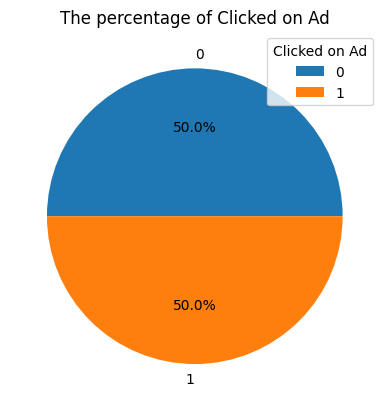

In [8]:
#Create the percentage of 'Clicked on Ad' 

click= ad_data['Clicked on Ad'].value_counts()

plt.pie(click,labels=click.index, autopct="%1.1f%%")

plt.legend(title='Clicked on Ad')
plt.title('The percentage of Clicked on Ad')

<Axes: xlabel='Age', ylabel='Count'>

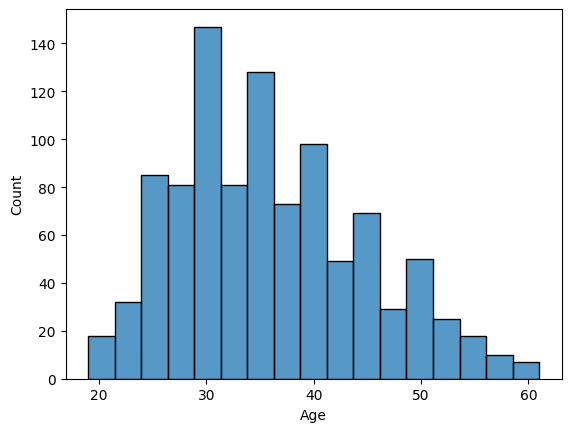

In [9]:
#Create a histogram of the Age

sns.histplot(data = ad_data, x = 'Age')

<Axes: xlabel='Age', ylabel='Count'>

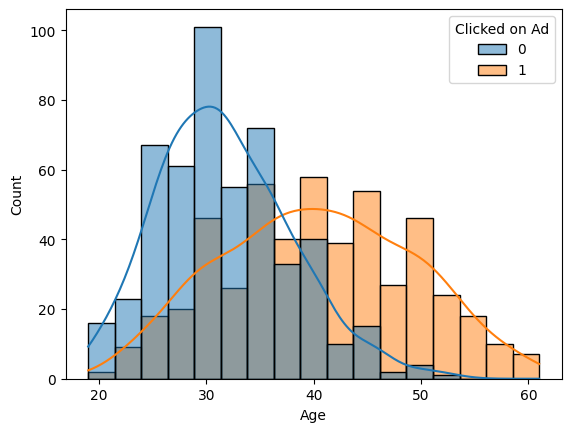

In [10]:
#Create a histogram of the Age 

sns.histplot(data = ad_data,x = 'Age', hue = 'Clicked on Ad',kde = True)

<Axes: xlabel='Area Income', ylabel='Count'>

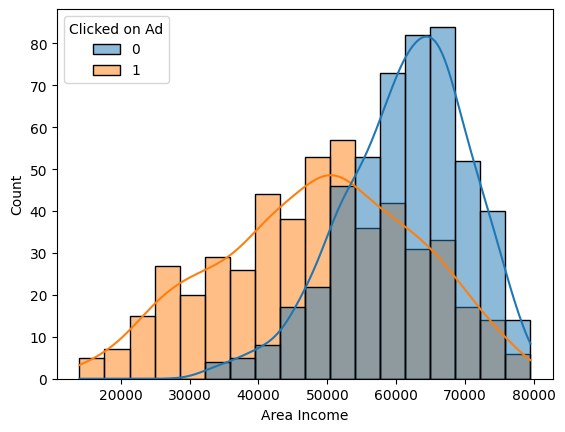

In [11]:
#Create a histogram of the Area Income

sns.histplot(data = ad_data,x = 'Area Income', hue = 'Clicked on Ad',kde = True)

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

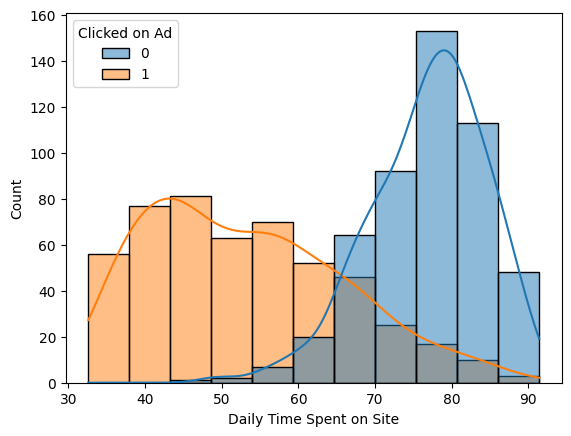

In [12]:
#Create a histogram of the 'Daily Time Spent on Site'

sns.histplot(data = ad_data,x = 'Daily Time Spent on Site', hue = 'Clicked on Ad',kde = True)

<Axes: xlabel='Daily Internet Usage', ylabel='Count'>

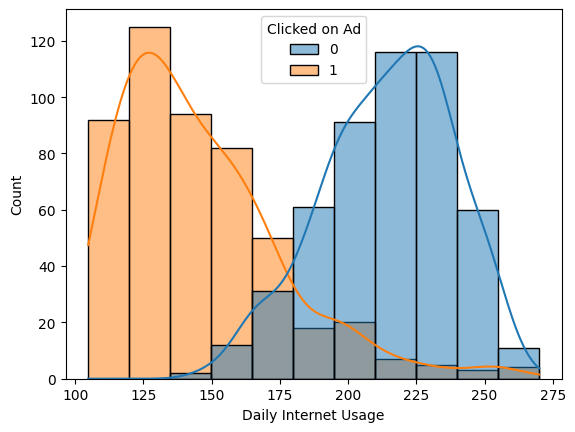

In [13]:
#Create a histogram of the'Daily Internet Usage'

sns.histplot(data = ad_data,x = 'Daily Internet Usage', hue = 'Clicked on Ad',kde = True)

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Day of week')

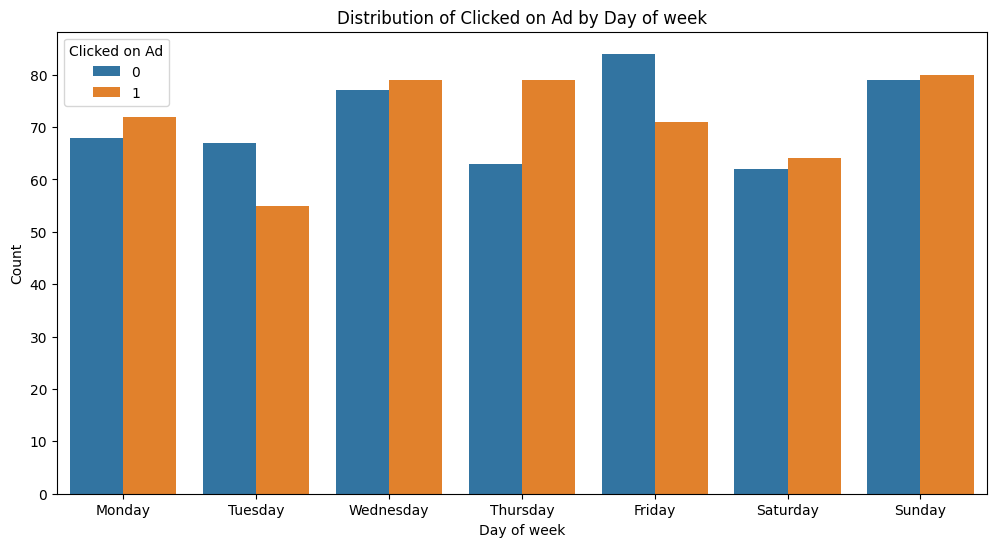

In [14]:
#Distribution of Clicked on Ad by Day of week

plt.figure(figsize=(12,6))
order = (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

sns.countplot(x='Day of week', hue='Clicked on Ad', data=ad_data, order=order)

plt.xlabel('Day of week')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Day of week')

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Day')

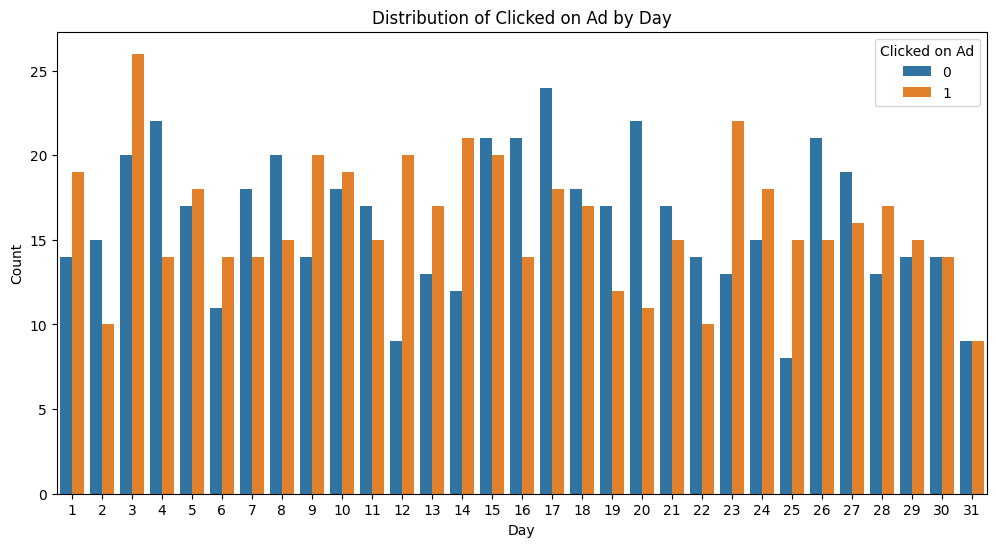

In [15]:
#Distribution of Clicked on Ad by Day

plt.figure(figsize=(12,6))

sns.countplot(x='Day', hue='Clicked on Ad', data=ad_data)

plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Day')

<Axes: xlabel='Day', ylabel='Count'>

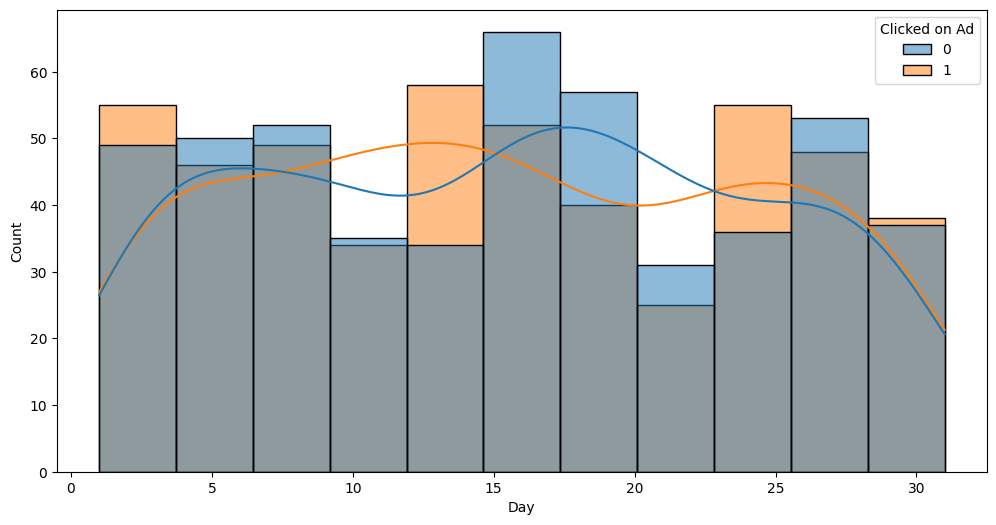

In [16]:
#Try to use histplot

plt.figure(figsize=(12,6))

sns.histplot(data = ad_data,x = 'Day', hue = 'Clicked on Ad',kde = True)

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Month')

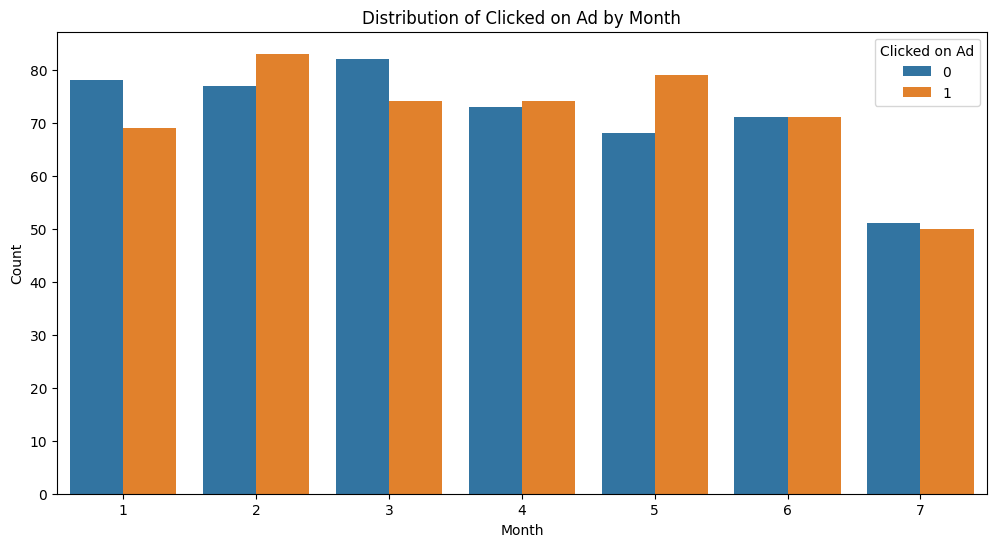

In [17]:
#Distribution of Clicked on Ad by Month

plt.figure(figsize=(12,6))

sns.countplot(x='Month', hue='Clicked on Ad', data=ad_data)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Month')

<Axes: xlabel='Month', ylabel='Count'>

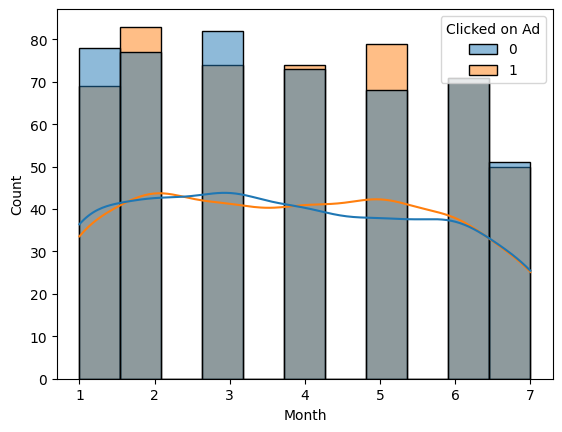

In [18]:
#Try to use histplot

sns.histplot(data = ad_data,x = 'Month', hue = 'Clicked on Ad',kde = True)

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Hour')

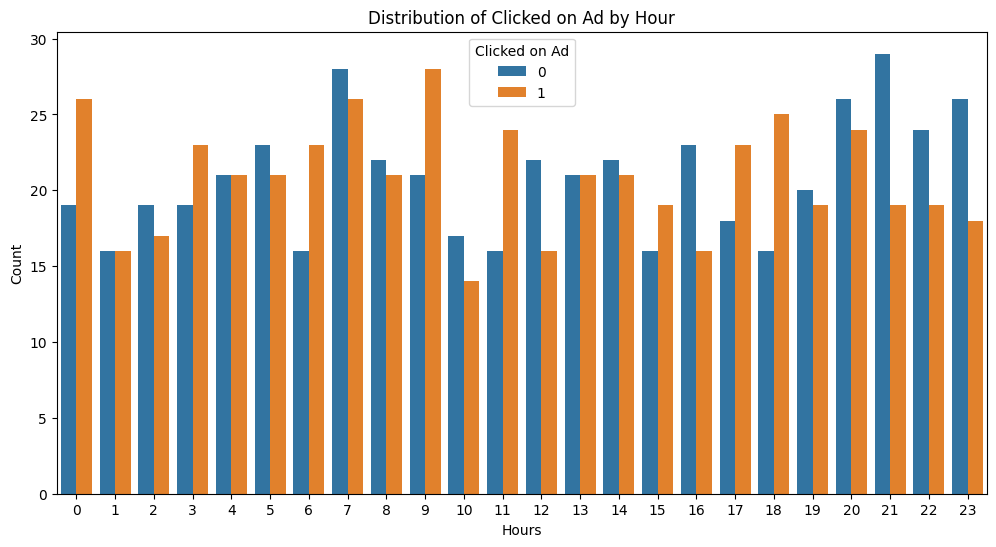

In [19]:
#Distribution of Clicked on Ad by Hour

plt.figure(figsize=(12,6))

sns.countplot(x='Hour', hue='Clicked on Ad', data=ad_data)

plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Hour')

<Axes: xlabel='Hour', ylabel='Count'>

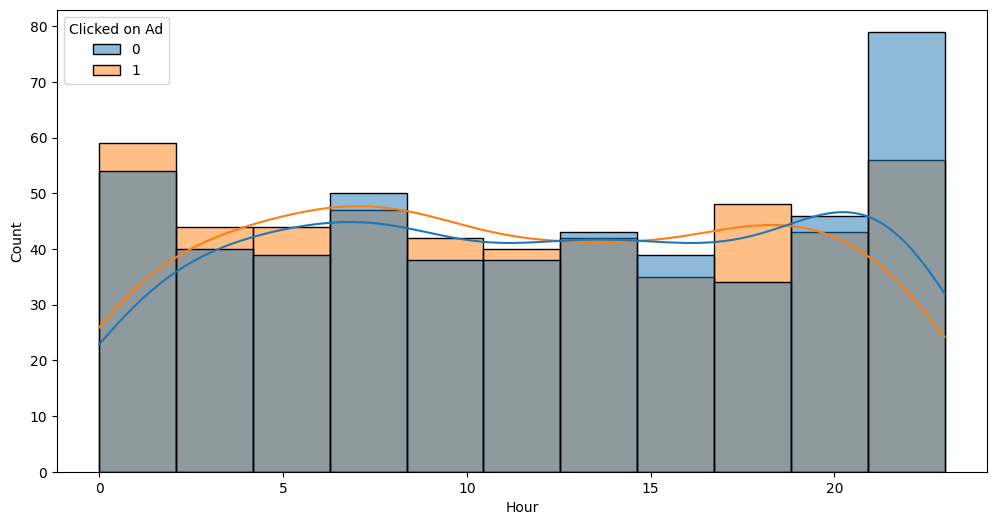

In [20]:
#Try to use histplot

plt.figure(figsize=(12,6))

sns.histplot(data = ad_data,x = 'Hour', hue = 'Clicked on Ad',kde = True)

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Gender')

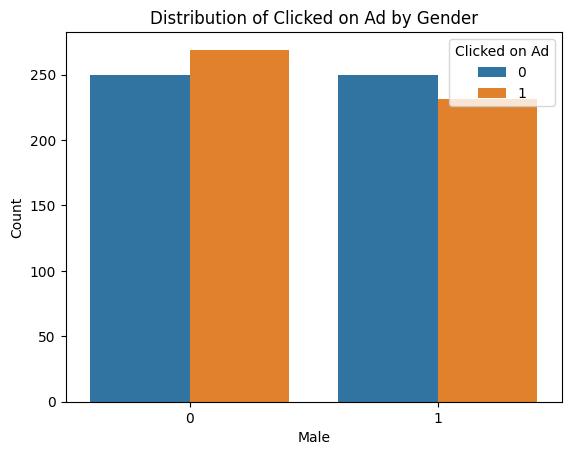

In [21]:
#Distribution of Clicked on Ad by Gender

sns.countplot(x='Male', hue='Clicked on Ad', data=ad_data)

plt.xlabel('Male')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Gender')

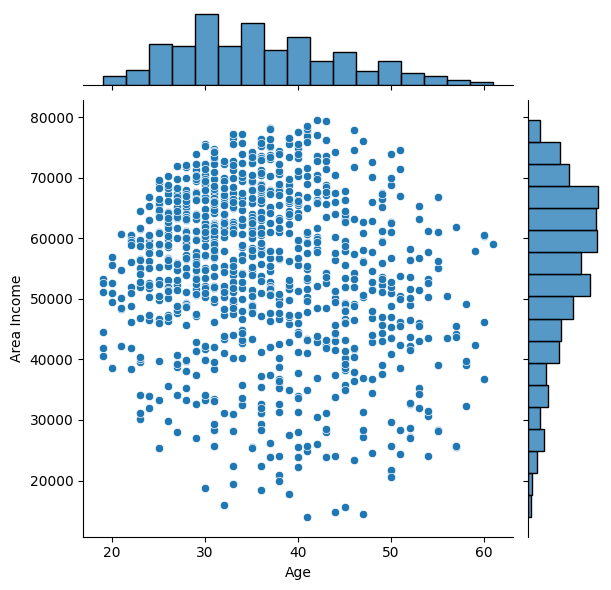

In [22]:
#Create a jointplot showing 'Area Income' versus 'Age'.

sns.jointplot(x = 'Age',y = 'Area Income',data = ad_data)

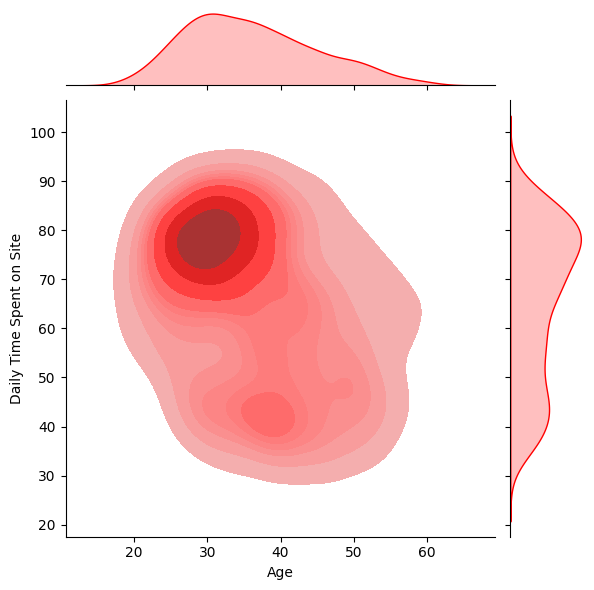

In [23]:
#Create a jointplot showing the kde distributions of 'Daily Time spent on site' versus 'Age'.

sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde',fill = True)

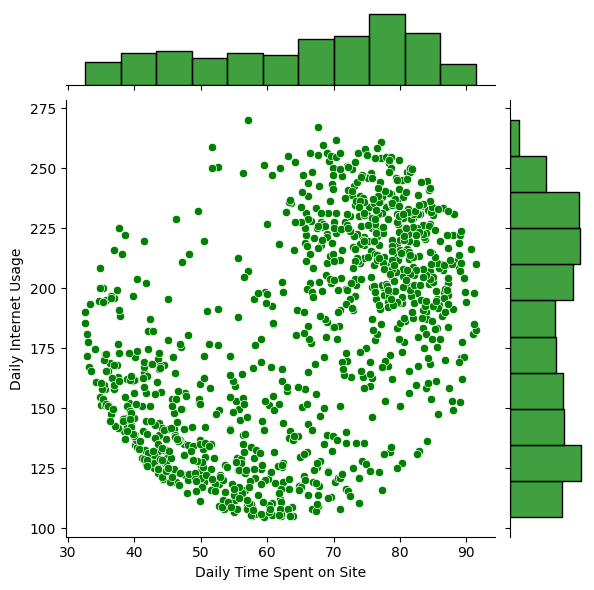

In [24]:
#Create a jointplot of 'Daily Time Spent on Site' versus 'Daily Internet Usage'

sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

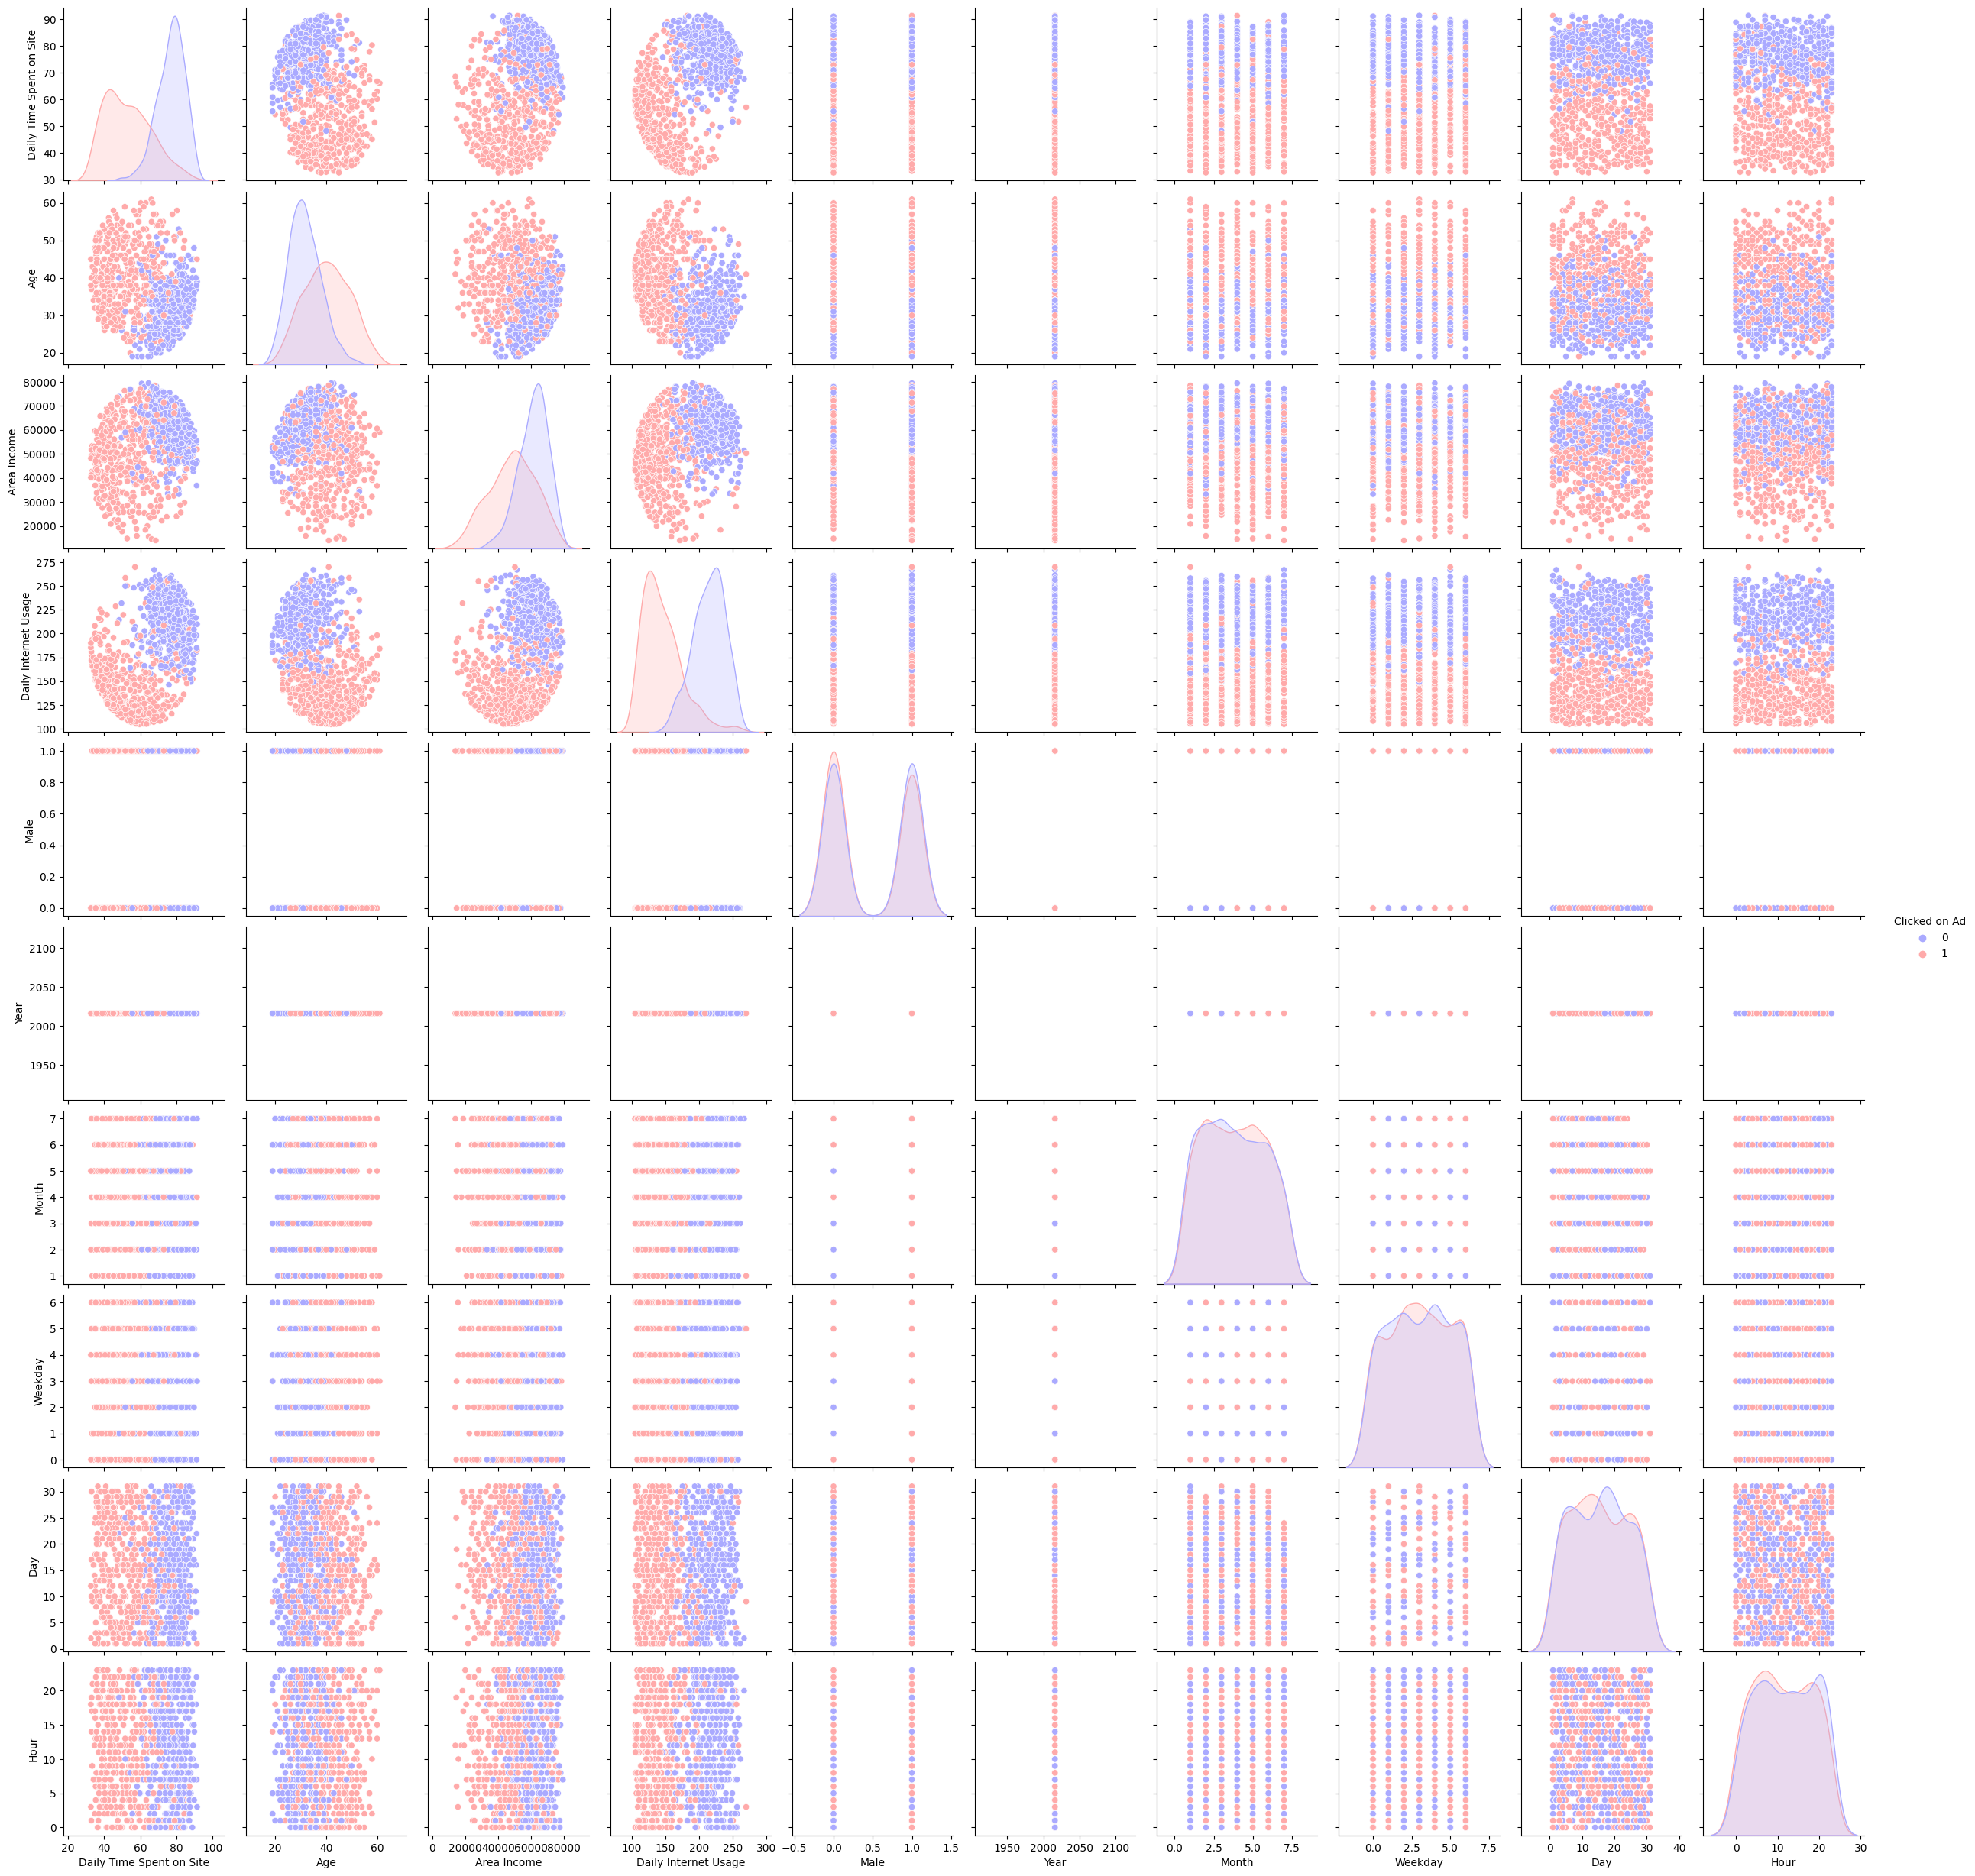

In [25]:
#Create a pairplot with the hue defined by the 'Clicked on Ad' column feature

sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# Training a Logistic Regression Model

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the 'Clicked on Ad' column.

In [26]:
#Check the column names

ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Year', 'Month', 'Weekday', 'Day of week',
       'Day', 'Hour'],
      dtype='object')

In [27]:
# X = Columns as Features

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]

In [28]:
# y = 'Clicked on Ad' as Target Variable, what we trying to predict

y = ad_data['Clicked on Ad']

**Train Test Split**

Now let's split the data into a training set and a testing set.

We will train out model on the training set and then use the test set to evaluate the model.

In [29]:
#Import the Library

from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [31]:
#Import the Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression

In [32]:
#Create the Logistic Regression Object

logmodel = LogisticRegression()


In [33]:
#Training the Data Model

logmodel.fit(X_train,y_train)

LogisticRegression()

# Predictions and Evaluations

In [34]:
#Predict values for the testing data

predictions = logmodel.predict(X_test)

In [35]:
#Create a classification report for the model

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



This project, I have create some basic EDA and a Logistic Regression model.

Next, I think I should try another model to compare the result, which model is the best for this dataset.

Any comment or suggestions would be appreciated. Thank you. :)